In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_parquet('pumpkin.parquet')

In [4]:
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [5]:
df['target'] = 0
df.loc[df.Class == 'Çerçevelik', 'target'] = 1

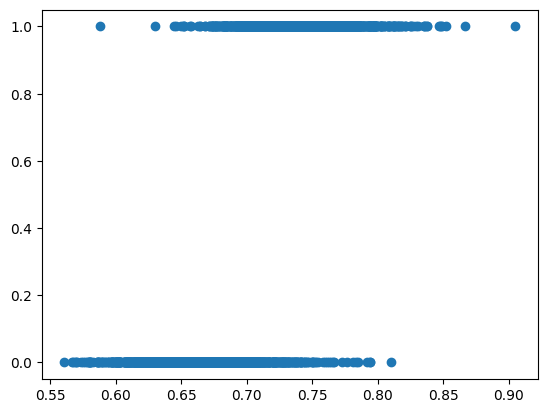

In [6]:
plt.scatter(df.Compactness, df.target)
plt.show()

In [7]:
x,y = np.array(df.Compactness).reshape(-1,1), np.array(df.target)

In [8]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [9]:
pd.DataFrame(classification_report(y, model.predict(x), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.897507,0.839097,0.8644,0.868302,0.867134
recall,0.810000,0.914615,0.8644,0.862308,0.864400
f1-score,0.851511,0.875230,0.8644,0.863371,0.863845
support,1200.000000,1300.000000,0.8644,2500.000000,2500.000000


In [10]:
model.intercept_

array([-11.02968348])

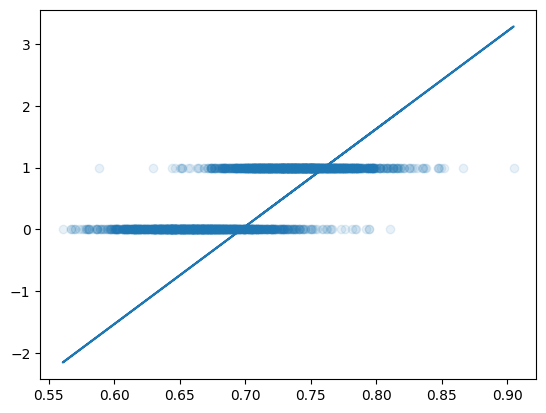

In [11]:
plt.scatter(x,y, alpha=.1)
plt.plot(x, ((model.coef_ * x) + model.intercept_))

plt.show()

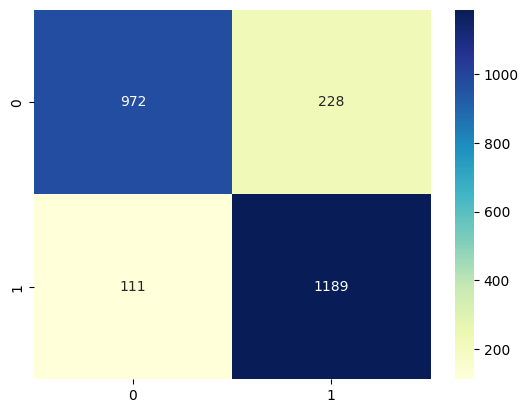

In [12]:
cm = confusion_matrix(y, model.predict(x))

sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='.0f')
plt.show()